# Text Classification using Sklearn
For those of you that completed the coding exercise in week 1 this will look familiar and it should therefore be quite easy. In this exercise we solve the same problem using Sklearn.
Try to do it anyways as it may give a wider perspective on the problem.

In this exercise we try to use machine learning for a problem where the featuere data is strings instead of vectors of numbers (like it would be for spam detection).

The simple trick to continue as before is to turn strings into vectors of numbers and then attack the problem as in the last exercise.
In this exercise we use the simplest way of turning strings into vectors and then applying a standard learning algorithm for classifying text.

##  The Problem
In this exercise we will try to help the Danish Business Authority (DBA). Each company in Denmark is registered at DBA with a <i>purpose statement</i> and an <i>industry code</i>. For example:  
<table>
 <tr>
  <td><b>Purpose Statement</b></td>
  <td><b>Industry Code</b></td>
 </tr>
<tr>
  <td>Make sushi to people</td>
  <td>1113</td>
</tr>
<tr>
  <td>Make spaghetti to people</td>
  <td>1113</td>
</tr>
<tr>
  <td>Fix peoples laptop</td>
  <td>324</td>
</tr>
<tr>
  <td>Make lasagna to people</td>
  <td>1113</td>
</tr>
<tr>
  <td>Fix peoples smartphones</td>
  <td>324</td>
</tr>
</table>

In the above example is seems that the industry code 1113 has something to do with making food for people, it might be the industry code for restaurants. Similarly 324 might be the company code for technology related business. The above example is made up. You will be working with real data.  

The DBA suspect some companies provide incorrect industry codes. They want to detect industry codes that are probably incorrect and help new companies select the right industry code. To help with this we want an algorithm that

    Given a string (the purpose statement of a company) outputs the most likely associated industry code. 

If we are succesful in doing so, we would be able to 
    1. suggest industry codes to new companies 
    2. find industry codes that are not the most likely (they might be errors) 
In the real world there are around <b>650</b> different industry codes. To make the exercise easier, we will only consider two different industry codes: *Restaurants* and *Computer Programming*.

To see examples of the actual data run the cell below (you do not need to understand the code).



In [1]:
# first some magic functions you can ignore
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.display import display    
import pandas as pd
pd.set_option('max_colwidth', 120)
import numpy as np
import os
import urllib
from sklearn.model_selection import train_test_split

def load_branche_data(keys):
    """
    Load the data in branche_data.npz and save it in lists of
    strings and labels (whose entries are in {0,1,..,num_classes-1})
    """
    filename = 'branchekoder_formal.gzip'
    if not os.path.exists(filename):
        with open(filename, 'wb') as fh:
            path = "http://users-cs.au.dk/jallan/ml/data/{0}".format(filename)
            fh.write(urllib.request.urlopen(path).read())
    data = pd.read_csv(filename, compression='gzip')
    actual_class_names = []
    features = []
    labels = []
    for i, kv in enumerate(keys):
        key = kv[0]
        name = kv[1]
        strings = data[data.branchekode == key].formal.values
        features.extend(list(strings))
        label = [i] * len(strings)
        labels.extend(label)
        actual_class_names.append(name)
    assert len(features) == len(labels)
    features = np.array(features)
    labels = np.array(labels)
    return features, labels, actual_class_names


def get_branche_data(keys):
    features, labels, actual_class_names = load_branche_data(keys)
    X_train, X_test, y_train, y_test = train_test_split(features, labels)
    return X_train, X_test, y_train, y_test, actual_class_names


def print_errors(classifier, feat, raw_feat, labels, class_names, top=10):
    """ Print first top errors made """
    pred = classifier.predict(feat)
    idx = pred != labels
    top_errors = np.nonzero(idx)
    top_errors = top_errors[0]
    top_errors = top_errors[0:top]
    print('*'*30)
    for err_idx in top_errors:        
        print('\nMispredicted: ', raw_feat[err_idx])
        print('Classifier Prediction: ', pred[err_idx], class_names[pred[err_idx]])
        print('Actual Label: ', labels[err_idx], class_names[labels[err_idx]])
    print('*'*30)


keys = [(561010, 'Restauranter'), (620100, 'Computerprogrammering')]
feat_train, feat_test, lab_train, lab_test, cnames = get_branche_data(keys)
class_names = [keys[0][1], keys[1][1]]
print('Lets see some examples')
names = np.array([class_names[i] for i in lab_train])
data = pd.DataFrame(np.c_[names, feat_train], columns=['classname', 'description'])
display(data.head(20))

rest = data[data.classname == class_names[0]] # notice the cool filtering going on here.
rest_vc = rest.description.value_counts().to_frame()
print("\n\nThe 20 most frequent purpose statements of Restaurants:")
display(rest_vc[0:20])
print('-'*80)

cpu = data[data.classname == class_names[1]]
cpu_vc = cpu.description.value_counts().to_frame() 
print("\n\nThe 20 most frequent purpose statements of Computer Programming")
display(cpu_vc[0:20])

Lets see some examples


,classname,description
0,Restauranter,Selskabets formål er at drive restauration og dermed beslægtet virksomhed.
1,Computerprogrammering,Virksomhedens formål er at at sælge og drifte software.
2,Restauranter,Selskabets formål er at drive restaurationsvirksomhed samt at besidde fast ejendom.
3,Restauranter,Selskabets formål er at drive restaurationsvirksomhed samt enhver i forbindelse\r\nhermed stående virksomhed.
4,Computerprogrammering,Selskabets formål er at levere web baserede IT-løsninger samt hermed relaterede konsulentydelser.
5,Computerprogrammering,Selskabets formål er software udvikling samt beslægtede områder.
6,Computerprogrammering,Selskabets formål er udvikling og rådgivning vedrørende standard- og kundespecifik software og hermed efter ledelsen...
7,Computerprogrammering,"Selskabets formål er at drive virksomhed med henblik på at udvikle software og levere services indenfor industri, In..."
8,Restauranter,Selskabets formål er at drive virksomhed inden for restaurationsbranchen og dermed beslægtet virksomhed.
9,Restauranter,Virksomhedens formål er restaurationsdrift.




The 20 most frequent purpose statements of Restaurants:


,description
Selskabets formål er at drive restaurationsvirksomhed.,100
Selskabets formål er at drive restaurationsvirksomhed,48
Selskabets formål er at drive restaurationsvirksomhed og dermed beslægtet virksomhed.,39
Selskabets formål er at drive restaurationsvirksomhed samt enhver i forbindelse hermed stående virksomhed.,20
Selskabets formål er at drive restaurationsvirksomhed og dermed beslægtet virksomhed,20
Selskabets formål er at drive restaurationsvirksomhed samt dermed beslægtet virksomhed.,17
Selskabets formål er at drive restaurationsvirksomhed samt hermed beslægtet virksomhed.,16
Selskabets formål er at drive restaurationsvirksomhed og hermed beslægtet virksomhed.,15
Selskabets formål er at drive restauration og dermed beslægtet virksomhed.,13
Selskabets formål er at drive McDonald´s Familie-Restaurant og hermed beslægtet virksomhed.,13


--------------------------------------------------------------------------------


The 20 most frequent purpose statements of Computer Programming


,description
Selskabets formål er at udøve virksomhed med handel og service samt aktiviteter i tilknytning hertil.,23
"Selskabets formål er at drive virksomhed med handel og service, samt enhver i forbindelse hermed stående virksomhed.",13
Selskabets formål er at drive handel og industri.,9
"Selskabets formål er at drive IT-konsulentvirksomhed, samt hermed beslægtet virksomhed.",7
"Selskabets formål er at drive informationsteknologisk virksomhed og anden i forbindelse hermed stående virksomhed, herunder at besidde andele i andre selskaber.",5
"Selskabets formål er at drive virksomhed med software udvikling, samt enhver i forbindelse hermed stående virksomhed.",5
Selskabets formål er at drive IT-virksomhed.,5
Selskabets formål er salg og udvikling af internetrelaterede ydelser samt dermed beslægtet virksomhed.,5
Selskabets formål er at drive virksomhed med softwareudvikling samt enhver i forbindelse hermed stående virksomhed.,5
Selskabets formål er handel og investering og dermed beslægtet virksomhed.,4


## Text Classification Approach
The first learning algorithm we will use is named Multinomial Naive Bayes (which you may have implemented from scratch last week - here we tools available in Scikit-learn).

However, like many other learning algorithms this algorithm expects the input to be vectors of numbers, not strings. So, first we need to make strings into vectors of numbers before we can apply the learning algorithm.
Of course the way we transform strings to vectors of numbers is important, here we will try the simplest one that works well enough. 

This is roughly done as follows:

* First we make a dictionary of words we care about (could be all words in the input) and order the words arbitrarily.
* We then consider a string as a list of unordered words by mapping a string to to the vector v, such that $v[i]$ is the number of times a string contains the i'th word in the dictionary of words.

This is called a Bag of Words representation (sounds reasonable right).

After the transformation, we have data on vector form as our supervised learning algorithms like.

We now turn to Multinomial Naive Bayes. This learning algorithm is simply based on for each class counting the occurrences of words in the associated input vectors (representing strings as bags of words) and use these frequencies to determine which class a new string most likely originates from.
At a high level, to classify a new string, pick the class where the words it contains are most frequent.

See coding exercise for week 1 for a longer explanation.

To make strings to vectors we use the sklearn CountVectorizer.
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
It has a fit method and a transform method. 
* The **fit** makes the dictionary of words and the word mapping, i.e. from word to index in dictionary.
* The **Transform**, takes a vector of strings and makes a vector of vectors (matrix) represented as a sparse matrix/vectors since each string has only few of all the words in the dictionary.

This vector representation can then be plugged directly into standard learning algorithms which in this case will be Multinomial Naive Bayes.
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
Logistic Regression, Decision Trees, Neural Nets and other learning algorithms could easily be applied as well.

So Lets first take a look at how to make strings to vectors using the Countvectorizer before we build a classifier.
## The CountVectorizer
In the cell bellow i have shown a simple application of the count vectorizer and how it makes strings to vectors.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
c = CountVectorizer()
strings = ['basic text classification seems basic enough', 
           'yes basic text classification is pretty pretty pretty', 
           'basic is a pretty start it is']
c.fit(strings)
print('Lets see the dictionary of words')
print(c.get_feature_names())
print('\nLets the the vectors:\n')
vectors = c.transform(strings).todense() # otherwise stored in sparse format
print(c.transform(strings))
print(vectors)
z = pd.DataFrame(vectors, index=strings, columns=c.get_feature_names())
display(z)

Lets see the dictionary of words
['basic', 'classification', 'enough', 'is', 'it', 'pretty', 'seems', 'start', 'text', 'yes']

Lets the the vectors:

  (0, 0)	2
  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 5)	3
  (1, 8)	1
  (1, 9)	1
  (2, 0)	1
  (2, 3)	2
  (2, 4)	1
  (2, 5)	1
  (2, 7)	1
[[2 1 1 0 0 0 1 0 1 0]
 [1 1 0 1 0 3 0 0 1 1]
 [1 0 0 2 1 1 0 1 0 0]]


,basic,classification,enough,is,it,pretty,seems,start,text,yes
basic text classification seems basic enough,2,1,1,0,0,0,1,0,1,0
yes basic text classification is pretty pretty pretty,1,1,0,1,0,3,0,0,1,1
basic is a pretty start it is,1,0,0,2,1,1,0,1,0,0


# Exercise 1: Implement a text classification algorithm.
Your job is simply to complete the implementation of naive_bayes_text_classification below by following the specified steps.

Test by running the cell which runs the test written last. You should get around 95 percent accuracy both on training and test set.

In [9]:
from sklearn.naive_bayes import MultinomialNB


def naive_bayes_text_classification(feat_train, feat_test, lab_train, lab_test):
    """ 
        
    Step 1. Vectorize string to bag of words vectors (CountVectorizer)
    Step 2. Create Classifier Object (MultinomialNB)
    Step 3. Fit Classifier to vectorized data and labels (feat_train, feat_test)
    Step 4. Test the insample error using the score function for the classifier - print the score to screen
    Step 5. Test the error on the test data same was as the trainining data - print the score to screen
    Step 6. Return classifier and countvectorizer
    accuracy scores should be around 0.95
    """
    
    ### YOUR CODE HERE 
    c = CountVectorizer()
    c.fit(feat_train)
    vectors_train = c.transform(feat_train).todense()
    classifier = MultinomialNB()
    classifier.fit(vectors_train, lab_train)
    print('In-sample score: {}'.format(classifier.score(vectors_train, lab_train)))
    
    vectors_test = c.transform(feat_test).todense()
    print('Out-sample score: {}'.format(classifier.score(vectors_test, lab_test)))
    ### END CODE
    
    return classifier, c

keys = [(561010, 'Restauranter'), (620100, 'Computerprogrammering')]
feat_train, feat_test, lab_train, lab_test, cnames = get_branche_data(keys)
classifier, vectorizer = naive_bayes_text_classification(feat_train, feat_test, lab_train, lab_test)


In-sample score: 0.9585951940850277
Out-sample score: 0.9600886917960089


# Lets Analyze the Classifier and the Errors it makes
The algorithm seems to do pretty well. 95% accuracy seem pretty good, but if we must do better we must know where we fail.
We will analyze this in the next cell.

* First lets see what the classifier is based on i.e. lets see some word counts.
* Next we print some errors and see if we can come up with some reasone why our classifier may fail on this.

I have written the code, all you need is to look at the output.
Notice that the results you see are random so you can try and run the experiment several times to get more interesting errors perhaps.

## First lets see some word statistics
When looking at the word counts it seems the classifier should have a chance i think. What do you think? What problems could there be?

In [10]:
print('Lets see what our classifer learned and bases predictions on')
names = np.array(vectorizer.get_feature_names())
counts = classifier.feature_count_
rest_count = counts[0, :]
prog_count = counts[1, :]
df = pd.DataFrame({'word': names, 'Restauranter': rest_count, 'Computerprogrammering': prog_count})
print('*'*30)
print('Lets see some word counts!')
display(df.sample(20))
print('*'*30)
print('Lets check words with computer in it')
display(df[df.word.str.contains('computer')])
  

Lets see what our classifer learned and bases predictions on
******************************
Lets see some word counts!


,word,Restauranter,Computerprogrammering
24,53,1.0,0.0
731,distribuere,0.0,10.0
2866,salgs,0.0,3.0
1583,inkorporering,1.0,0.0
1997,leje,1.0,1.0
1968,landbrugsmaskiner,0.0,1.0
2250,mulighederne,0.0,1.0
2586,processtyring,0.0,4.0
2216,mindre,0.0,3.0
618,datbaseløsninger,0.0,1.0


******************************
Lets check words with computer in it


,word,Restauranter,Computerprogrammering
547,computer,0.0,22.0
548,computerbaserede,0.0,1.0
549,computere,0.0,7.0
550,computergrafik,0.0,1.0
551,computerkode,0.0,1.0
552,computerløsninger,0.0,1.0
553,computerprogramering,0.0,2.0
554,computerprogrammel,0.0,1.0
555,computerprogrammer,0.0,5.0
556,computerprogrammering,0.0,59.0


# Lets see the errors then
Again, the code is already there. You just need to consider the result and maybe try to figure out why these examples fail.

In [11]:
print('Lets see some of the errors we made, made you can guess why our algorithm fails')
bag_of_words_feat_test = vectorizer.transform(feat_test)
print_errors(classifier, bag_of_words_feat_test, feat_test, lab_test, [x[1] for x in keys], top=10) 

Lets see some of the errors we made, made you can guess why our algorithm fails
******************************

Mispredicted:  Selskabets formål er eventaktiviteter og hermed tilknyttet virksomhed.
Classifier Prediction:  0 Restauranter
Actual Label:  1 Computerprogrammering

Mispredicted:  Selskabets formål er at drive forretning gennem en mobilapplikation.
Classifier Prediction:  0 Restauranter
Actual Label:  1 Computerprogrammering

Mispredicted:  Selskabets formål er at drive virksomhed med onlineløsninger hermed forbundet virksomhed.
Classifier Prediction:  0 Restauranter
Actual Label:  1 Computerprogrammering

Mispredicted:  Selskabets formål er handel og investering.
Classifier Prediction:  0 Restauranter
Actual Label:  1 Computerprogrammering

Mispredicted:  Selskabets formål er fremstilling og salg indenfor cafébranchen samt hermed beslægtet virksomhed.
Classifier Prediction:  1 Computerprogrammering
Actual Label:  0 Restauranter

Mispredicted:  Selskabets formål er at drive s

# Exercise 2: Repeat with Decision Trees to see what Decision Trees learn.
### Complete decision_tree_text_classification method below
Essentially replace naive bayes with trees.
Test by running the cell. 
Inspect the visualized tree below. Does it make sense to you? **(Make sure you set a max_depth for the tree classifier)**

What happens with the in sample error when you increase depth?. What happens to the out of sample error (test error)?
Does that seem reasonable?


In-sample score: 0.8720887245841035
Out-sample score: 0.8725055432372506
******************************

Mispredicted:  virksomhedens formål er salg af streetfood, restaurantvirksomhed og dermed beslægtet virksomhed
Classifier Prediction:  1 Computerprogrammering
Actual Label:  0 Restauranter

Mispredicted:  Virksomhedens formål er madsted.
Classifier Prediction:  1 Computerprogrammering
Actual Label:  0 Restauranter

Mispredicted:  Selskabets formål er at drive fastfoodvirksomhed samt hermed beslægtet virksomhed.
Classifier Prediction:  1 Computerprogrammering
Actual Label:  0 Restauranter

Mispredicted:  Selskabets formål er at drive fastfoodvirksomhed samt hermed beslægtet virksomhed.
Classifier Prediction:  1 Computerprogrammering
Actual Label:  0 Restauranter

Mispredicted:  Selskabets formål er at drive resturationsvirksomhed og dermed beslægtet virkosmhed.
Classifier Prediction:  1 Computerprogrammering
Actual Label:  0 Restauranter

Mispredicted:  Selskabets formål er at drive 

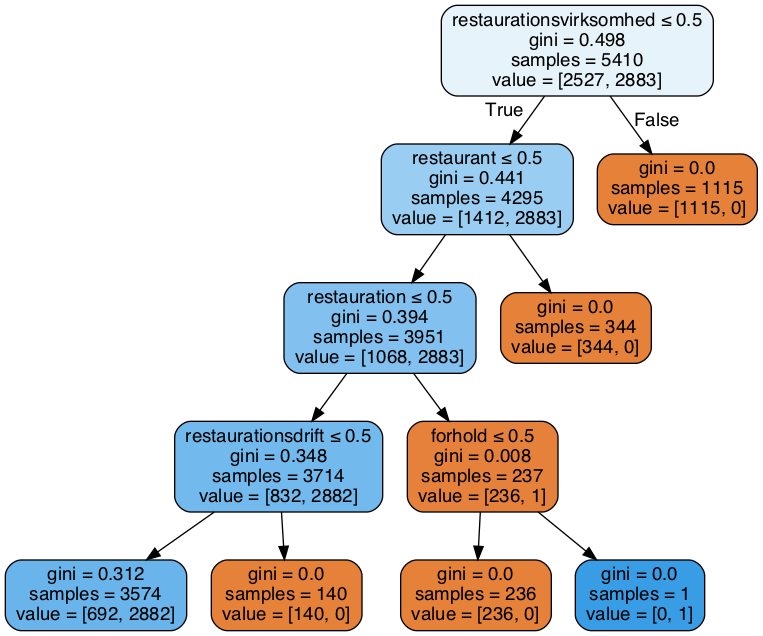

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus

def plot_tree(dtree, feature_names):
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    img = Image(graph.create_png())
    display(img)

def decision_tree_text_classification(feat_train, feat_test, lab_train, lab_test):
    """     
    Step 1. Vectorize string to bag of words vectors (CountVectorizer)
    Step 2. Create Classifier Object (DecisionTreeClassifier) - Set max_height (and maybe min_samples_split) in the constructor to control the size of the tree created i.e. min_samples_split=
            if you do not the tree will be massive which you will se when you visualize it.
    Step 3. Fit Classifier to vectorized data and labels
    Step 4. Test the insample error using the score function for the classifier - print the score to screen (use the score function)
    Step 5. Test the error on the test data same was as the trainining data - print the score to screen (use the score function)
    Step 6. Return the trained classifier and the countvectorizer
    
    depending on tree options 90-95% should be possible in accuracy
    """    
    c = CountVectorizer()
    classifier = None
    ### YOUR CODE HERE 
    c.fit(feat_train)
    vectors_train = c.transform(feat_train).todense()
    classifier = DecisionTreeClassifier(max_depth=4)
    classifier.fit(vectors_train, lab_train)
    print('In-sample score: {}'.format(classifier.score(vectors_train, lab_train)))
    
    vectors_test = c.transform(feat_test).todense()
    print('Out-sample score: {}'.format(classifier.score(vectors_test, lab_test)))    
    ### END CODE
        
    return classifier, c

keys = [(561010, 'Restauranter'), (620100, 'Computerprogrammering')]
feat_train, feat_test, lab_train, lab_test, cnames = get_branche_data(keys)
classifier, vectorizer = decision_tree_text_classification(feat_train, feat_test, lab_train, lab_test)
names = np.array(vectorizer.get_feature_names())
bag_of_words_feat_test = vectorizer.transform(feat_test)
print_errors(classifier, bag_of_words_feat_test, feat_test, lab_test, [x[1] for x in keys])  
plot_tree(classifier, names)